# Exploratory visualization in `pandas`

For exploring data, `pandas` actually has pretty decent visualization capabilities.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
pd.options.plotting.backend = 'matplotlib'

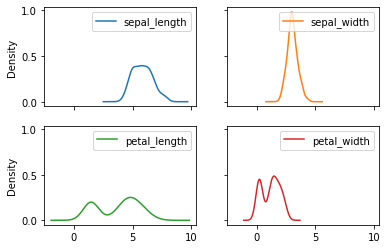

In [7]:
df.plot.kde(layout = (2,2), subplots = True, sharey=True)
pass

In [8]:
from pandas.plotting import boxplot_frame_groupby

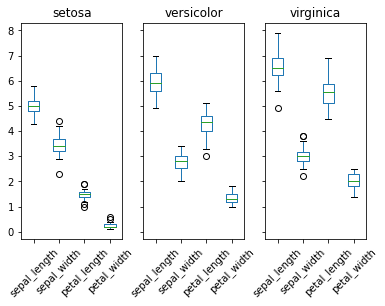

In [9]:
boxplot_frame_groupby(df.groupby('species'), layout=(1,3), grid=False, rot=45);

In [10]:
pd.options.plotting.backend = 'plotly'

In [11]:
df.plot.scatter(
    x='sepal_length', 
    y='petal_length', 
    color='species', 
    marginal_y="violin",
    marginal_x="box",
    trendline="ols"
)

## Using `pandas-bokeh`

In [12]:
pd.options.plotting.backend = 'pandas_bokeh'
import pandas_bokeh
from bokeh.io import output_notebook

ValueError: Could not find plotting backend 'pandas_bokeh'. Ensure that you've installed the package providing the 'pandas_bokeh' entrypoint, or that the package has a top-level `.plot` method.

In [ ]:
output_notebook()

Example from official docs: [pandas-bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh)

In [ ]:
df_mapplot = pd.read_csv(r"https://bit.ly/325W5Yy")
df_mapplot["size"] = df_mapplot["pop_max"] / 1000000
df_mapplot.plot_bokeh.map(
    x="longitude",
    y="latitude",
    hovertool_string="<h2> @{name} </h2> <h3> Population: @{pop_max} </h3>",
    tile_provider='STAMEN_TERRAIN_RETINA',
    size="size", 
    figsize=(900, 600),
    title="World cities with more than 1.000.000 inhabitants")

## More controlled visualizations

## Grammar of graphics in Python

If you love `ggplot2` and just want to stick with it.

In [13]:
import warnings
from plotnine import *
from plotnine.exceptions import PlotnineWarning
from plotnine.data import meat

warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', PlotnineWarning)

In [14]:
meat.sample(3)

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
281,1967-06-01,1748.0,60.0,919.0,49.0,548.0,NaN,102.4
716,2003-09-01,2314.0,15.3,1668.0,16.9,2817.2,40.2,459.6
320,1970-09-01,1868.0,49.0,1156.0,46.0,613.5,NaN,244.6


In [15]:
df = pd.melt(meat, id_vars=['date'], 
             var_name='meat', 
             value_name='price')

In [16]:
p = (
    ggplot(df, aes(x='date', y='price', color='meat')) +
    geom_line() +
    theme_xkcd() +
    labs(title="Lorem ipsum bacon")
)

findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


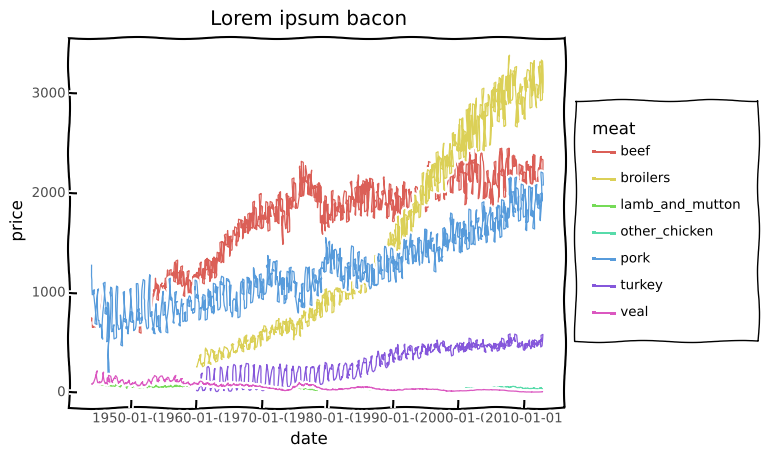

In [17]:
p.draw();

In [18]:
p.save('meat.png')

In [19]:
from IPython.display import Image

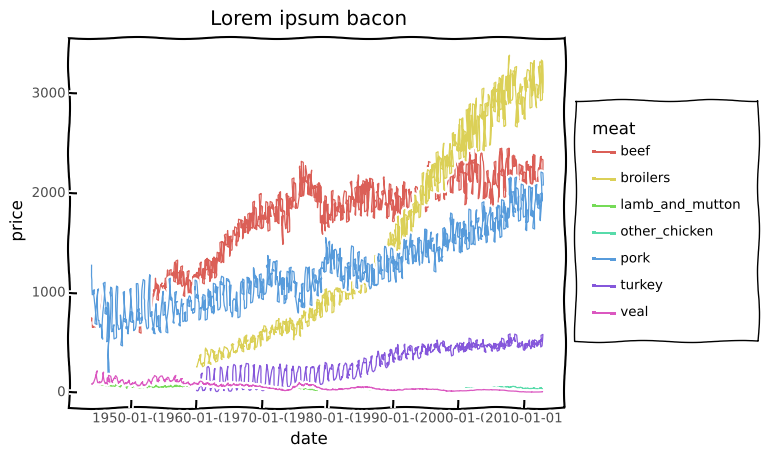

In [20]:
Image('meat.png')

## Similar plot in `seaborn`

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


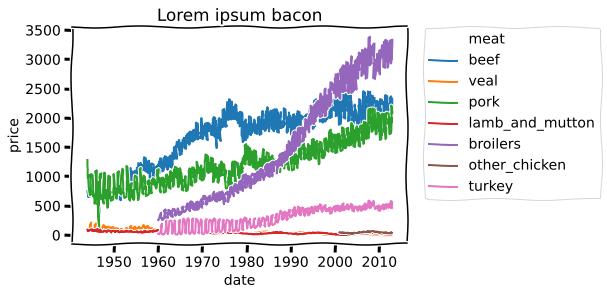

In [21]:
with plt.xkcd():
    g = sns.lineplot(data=df, x='date', y='price', hue='meat')
    g.set_title('Lorem ipsum bacon')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Show as heatmap

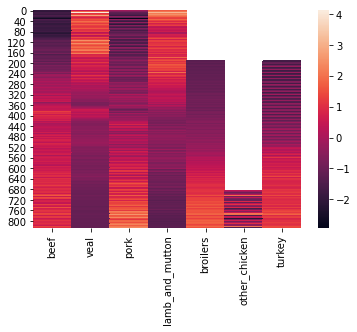

In [22]:
(
    sns.heatmap(
        meat.select_dtypes('number').
        apply(lambda x: (x-x.mean())/x.std(), axis=0))
)
pass